<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0        1      168      0      1.0      2   2     3       0
1   53    1   0       14

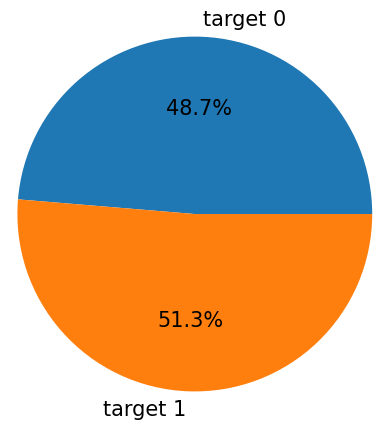

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 5000)

data = pd.read_csv('heart.csv')
# Description and information of the data
data.info()
# Data of the first five samples of head
data.head()
print(data.head())

# Randomly select 10 samples
data.sample(10)
print(data.sample(10))

# Simple analysis of data
data.describe()
print(data.describe())

# Check for missing data
data.isnull().sum()
print(data.isnull().sum())

# Check for relevance to target data
data.corr()["target"].abs().sort_values(ascending=False)
# Analyze whether the target classification is balanced
target_temp=data.target.value_counts()
print(target_temp)
print("Proportion of patients with heart disease:"+str(round(target_temp[1]*100/1025,2))+"%")
print("Proportion of patients without heart disease:"+str(round(target_temp[0]*100/1025,2))+"%")

# Pie Chart
data_target = data.groupby("target").size()
plt.pie(data_target.values, labels = ["target 0", "target 1"], autopct='%1.1f%%', radius = 1.2, textprops = {"fontsize" : 15})
plt.show()

1.Age Analysis Distribution

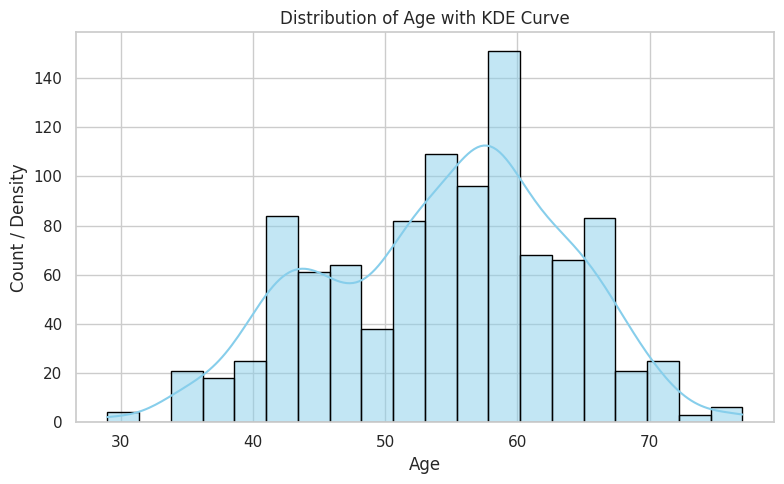

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart.csv")

sns.set(style="whitegrid")

# Draw Histogram + KDE curve
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Age with KDE Curve")
plt.xlabel("Age")
plt.ylabel("Count / Density")
plt.tight_layout()
plt.show()


2. Cholesterol Analysis

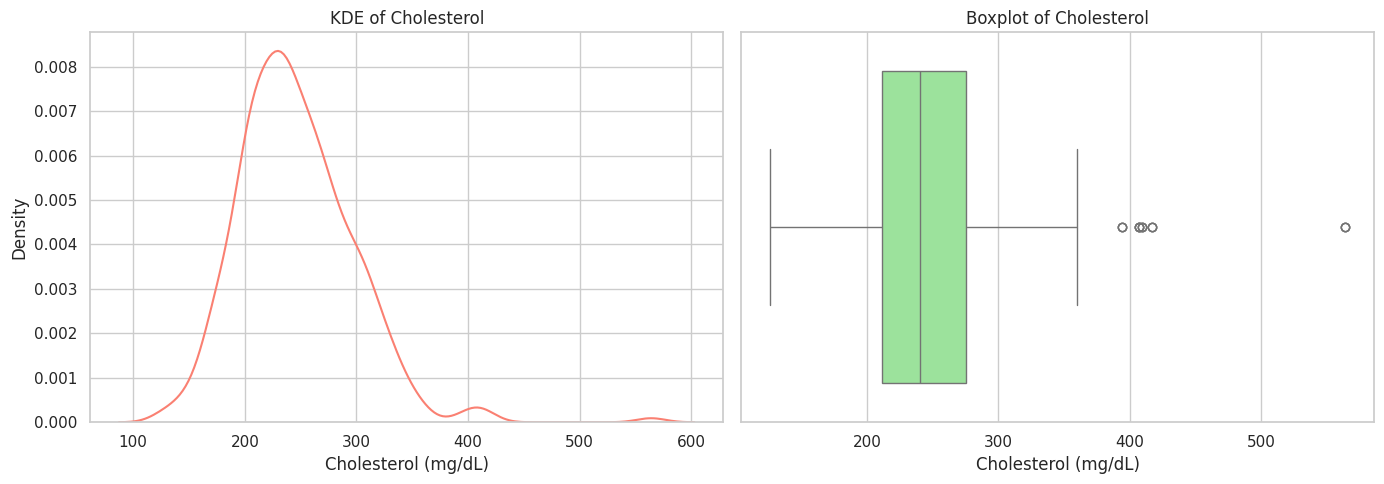

In [3]:
# Plotting KDE (line graph) + Boxplot of chol, avoiding fill parameter issues
plt.figure(figsize=(14, 5))

# KDE plot without fill
plt.subplot(1, 2, 1)
sns.kdeplot(df['chol'], color='salmon')
plt.title("KDE of Cholesterol")
plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Density")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['chol'], color='lightgreen')
plt.title("Boxplot of Cholesterol")
plt.xlabel("Cholesterol (mg/dL)")

plt.tight_layout()
plt.show()

3. Chest Pain Analysis Distribution

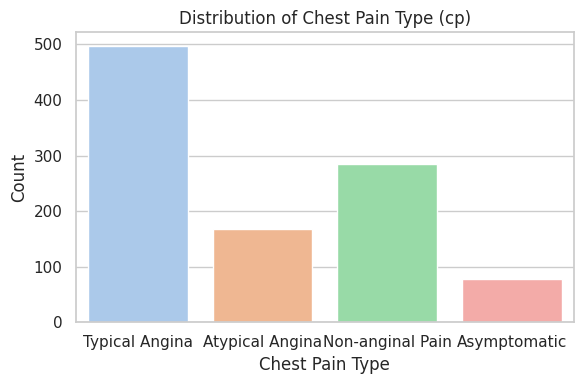

In [4]:
# Since the execution environment is reset, re-import the required libraries and data, and draw the graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart.csv")

# Count the frequency of the cp (chest pain type) variable
cp_counts = df['cp'].value_counts().sort_index()

# Plot a bar graph of cp
plt.figure(figsize=(6, 4))
sns.barplot(x=cp_counts.index, y=cp_counts.values, palette="pastel")
plt.title("Distribution of Chest Pain Type (cp)")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
plt.tight_layout()
plt.show()


4. Sex Analysis Distribution

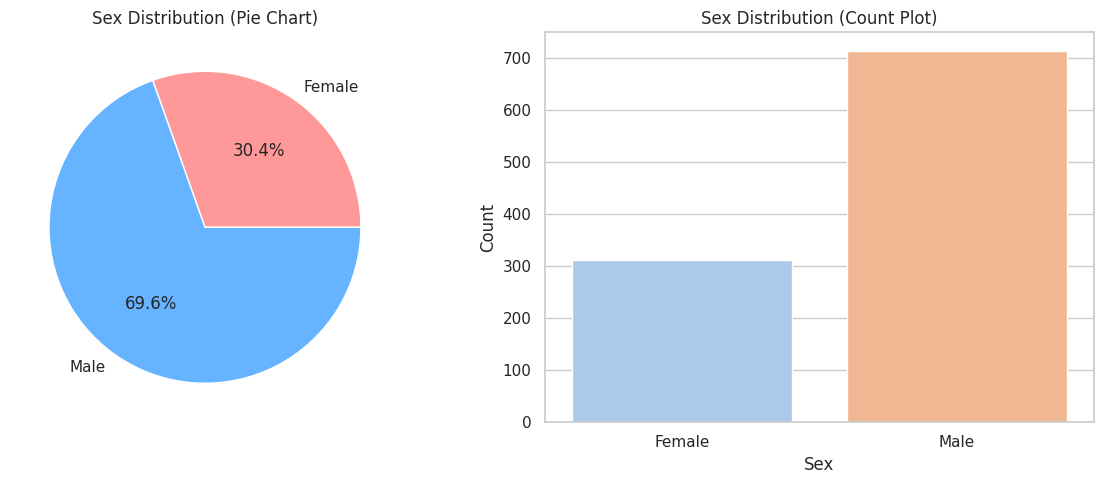

In [5]:
# Count the frequency of the sex variable
sex_counts = df['sex'].value_counts().sort_index()
sex_labels = ["Female", "Male"]

# Creating a subgraph
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Pie Chart
ax[0].pie(sex_counts, labels=sex_labels, autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"])
ax[0].set_title("Sex Distribution (Pie Chart)")

# Count Plot
sns.barplot(x=sex_labels, y=sex_counts.values, ax=ax[1], palette="pastel")
ax[1].set_title("Sex Distribution (Count Plot)")
ax[1].set_xlabel("Sex")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


5. Heart Disease Count By Thal Type

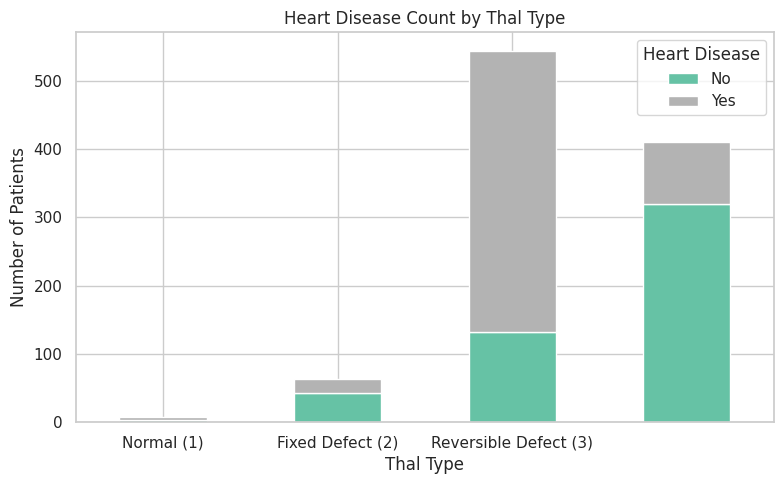

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")

# Make sure thal and target are integer types
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
df['target'] = pd.to_numeric(df['target'], errors='coerce')

# Create a table of target counts grouped by thal
thal_target_counts = df.groupby(['thal', 'target']).size().unstack(fill_value=0)

# Draw a stacked bar chart
thal_target_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title("Heart Disease Count by Thal Type")
plt.xlabel("Thal Type")
plt.ylabel("Number of Patients")
plt.xticks(ticks=[0, 1, 2], labels=["Normal (1)", "Fixed Defect (2)", "Reversible Defect (3)"], rotation=0)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


6. Heart Disease Count By Fasting Blood Sugar (Fbs)

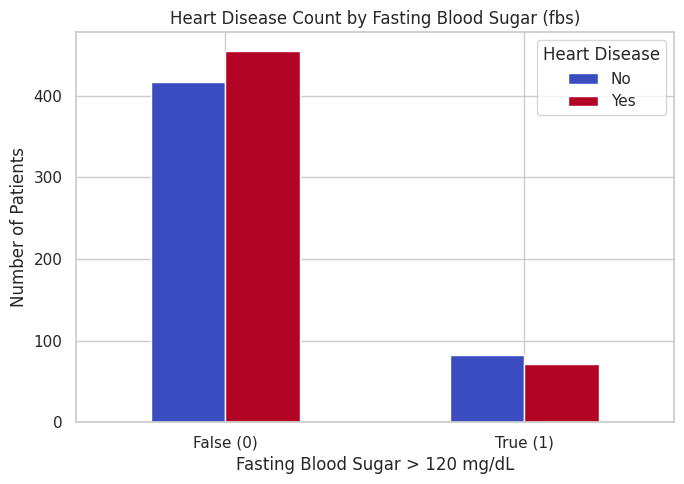

In [7]:
# Make sure fbs and target are numeric.
df['fbs'] = pd.to_numeric(df['fbs'], errors='coerce')
df['target'] = pd.to_numeric(df['target'], errors='coerce')

# Create a target count table under the fbs group
fbs_target_counts = df.groupby(['fbs', 'target']).size().unstack(fill_value=0)

# Draw a group comparison bar chart
fbs_target_counts.plot(kind='bar', figsize=(7, 5), colormap='coolwarm')
plt.title("Heart Disease Count by Fasting Blood Sugar (fbs)")
plt.xlabel("Fasting Blood Sugar > 120 mg/dL")
plt.ylabel("Number of Patients")
plt.xticks(ticks=[0, 1], labels=["False (0)", "True (1)"], rotation=0)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


7. Resting Blood Pressure (Trestbps) Analysis

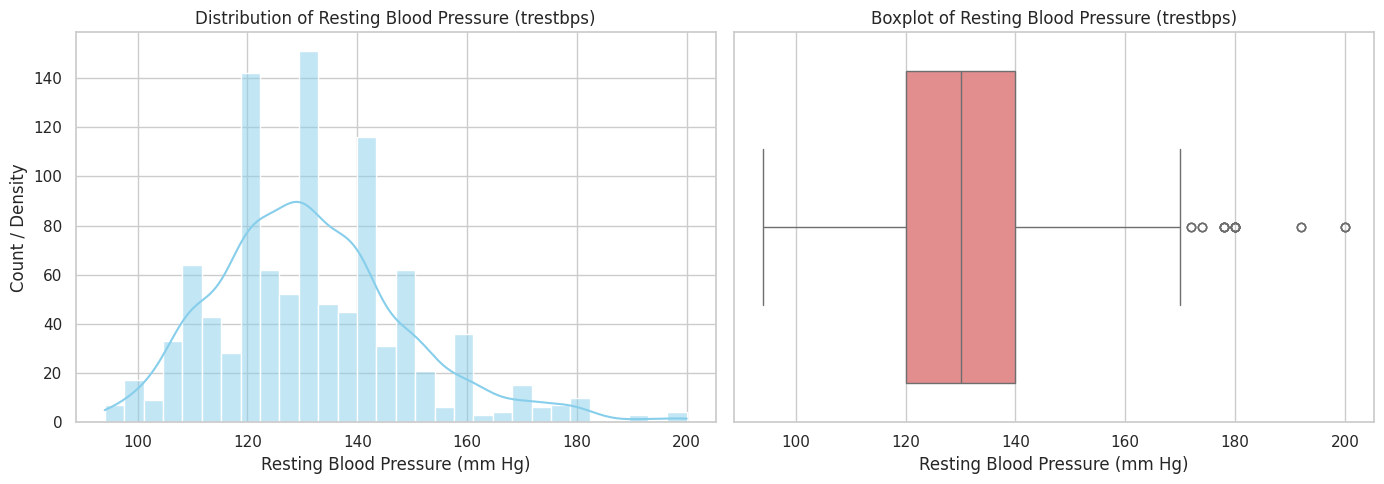

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart.csv")

# Make sure trestbps is a numeric value.
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')
df = df.dropna(subset=['trestbps'])

plt.figure(figsize=(14, 5))

# Histogram + KDE
plt.subplot(1, 2, 1)
sns.histplot(df['trestbps'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Resting Blood Pressure (trestbps)")
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.ylabel("Count / Density")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['trestbps'], color='lightcoral')
plt.title("Boxplot of Resting Blood Pressure (trestbps)")
plt.xlabel("Resting Blood Pressure (mm Hg)")

plt.tight_layout()
plt.show()


8. Mean Max Heart Rate By Heart Disease

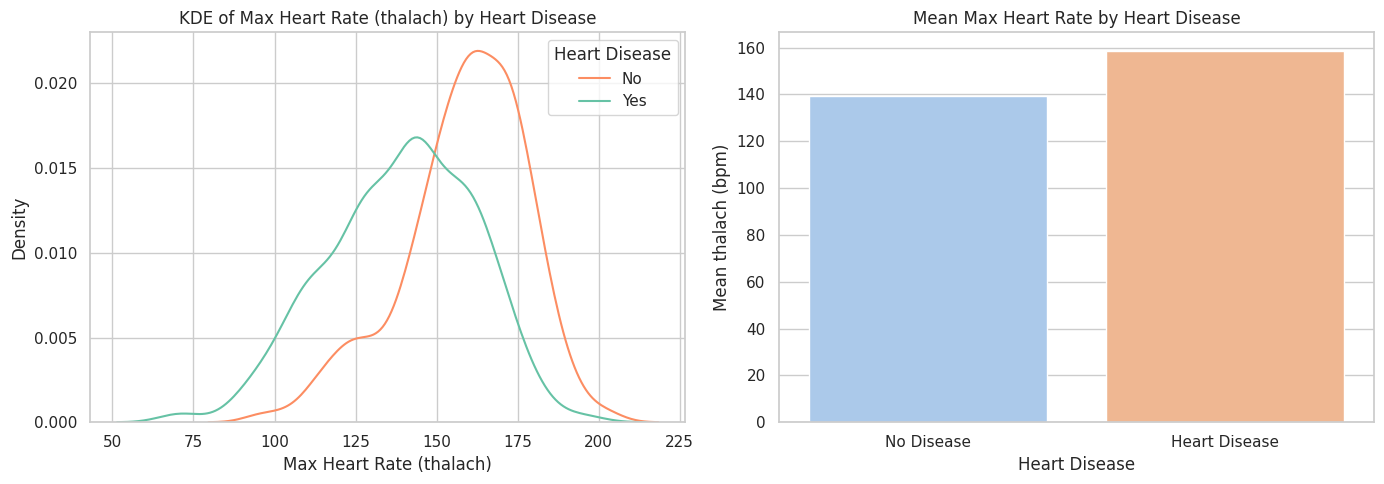

In [10]:
# Make sure thalach and target are numeric.
df['thalach'] = pd.to_numeric(df['thalach'], errors='coerce')
df['target'] = pd.to_numeric(df['target'], errors='coerce')
df = df.dropna(subset=['thalach', 'target'])

# Create canvas: KDE + grouped bar chart (mean comparison)
plt.figure(figsize=(14, 5))

# KDE
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='thalach', hue='target', common_norm=False, palette='Set2')
plt.title("KDE of Max Heart Rate (thalach) by Heart Disease")
plt.xlabel("Max Heart Rate (thalach)")
plt.ylabel("Density")
plt.legend(title="Heart Disease", labels=["No", "Yes"])

# Grouped mean histogram
plt.subplot(1, 2, 2)
mean_thalach = df.groupby('target')['thalach'].mean()
sns.barplot(x=mean_thalach.index, y=mean_thalach.values, palette='pastel')
plt.xticks([0, 1], ['No Disease', 'Heart Disease'])
plt.title("Mean Max Heart Rate by Heart Disease")
plt.ylabel("Mean thalach (bpm)")
plt.xlabel("Heart Disease")

plt.tight_layout()
plt.show()

9. Oldpeak Distribution By Heart Disease

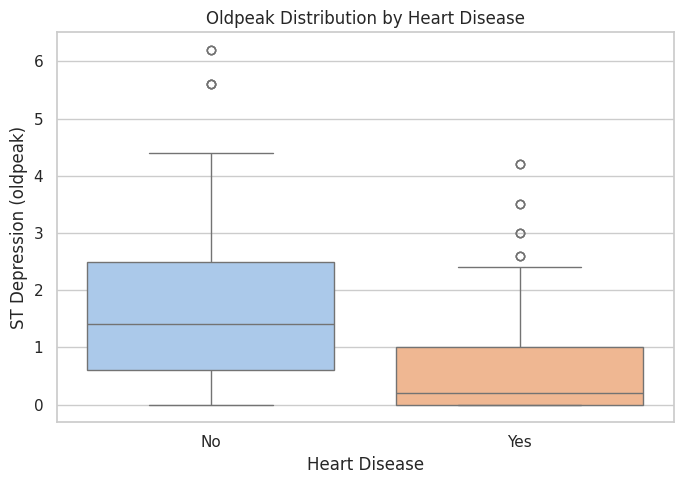

In [11]:
# Make sure oldpeak and target are numeric.
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')
df['target'] = pd.to_numeric(df['target'], errors='coerce')
df = df.dropna(subset=['oldpeak', 'target'])

# Boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x='target', y='oldpeak', data=df, palette='pastel')
plt.title("Oldpeak Distribution by Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("ST Depression (oldpeak)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.tight_layout()
plt.show()


10. Heart Disease Count By Number Of Vessels (Ca)

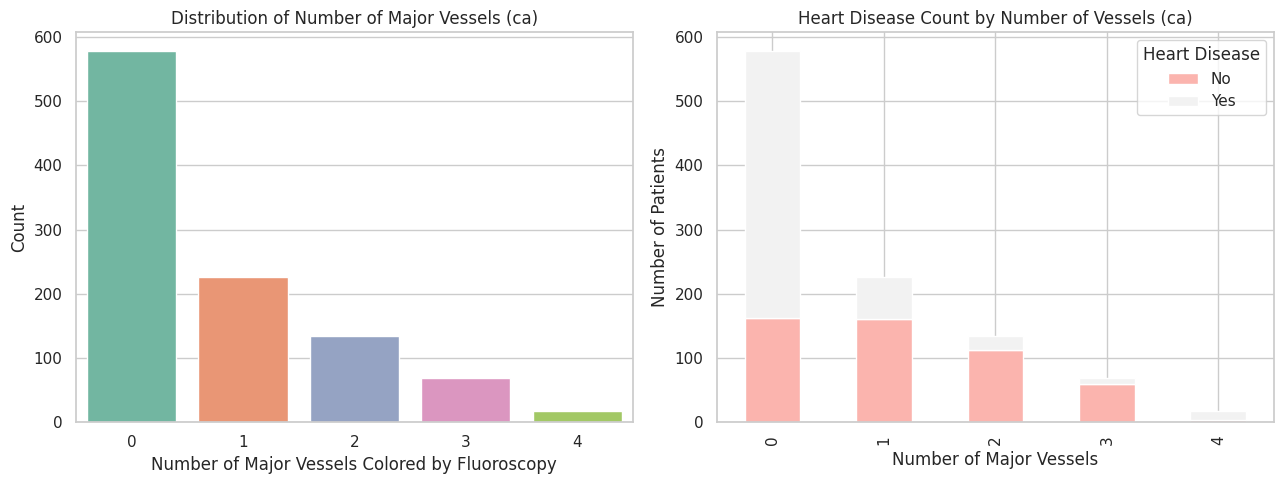

In [12]:
# Make sure ca and target are numeric values.
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['target'] = pd.to_numeric(df['target'], errors='coerce')
df = df.dropna(subset=['ca', 'target'])

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Bar chart: frequency of ca variable
sns.countplot(x='ca', data=df, palette='Set2', ax=axes[0])
axes[0].set_title("Distribution of Number of Major Vessels (ca)")
axes[0].set_xlabel("Number of Major Vessels Colored by Fluoroscopy")
axes[0].set_ylabel("Count")

# Grouped stacked bar chart: ca × target
ca_target_counts = df.groupby(['ca', 'target']).size().unstack(fill_value=0)
ca_target_counts.plot(kind='bar', stacked=True, colormap='Pastel1', ax=axes[1])
axes[1].set_title("Heart Disease Count by Number of Vessels (ca)")
axes[1].set_xlabel("Number of Major Vessels")
axes[1].set_ylabel("Number of Patients")
axes[1].legend(title="Heart Disease", labels=["No", "Yes"])

plt.tight_layout()
plt.show()
